In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [31]:
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Import scikit-learn MLP classifier
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler
import glob
import os
import re
import tifffile as tiff

In [33]:
folder_path = "D:\project\dataset\Gauss_1.0_0.3"
def natural_sort_key(s):
    sub_strings = re.split(r'(\d+)', s)
    sub_strings = [int(c) if c.isdigit() else c for c in sub_strings]
    return sub_strings
# 获取不同类别图片路径并加入到对应的列表中
emcal_list = sorted(glob.glob(os.path.join(folder_path, 'emcal_*')), key=natural_sort_key)
hcal_list = sorted(glob.glob(os.path.join(folder_path, 'hcal_*')), key=natural_sort_key)
tracker_list = sorted(glob.glob(os.path.join(folder_path, 'tracker_*')), key=natural_sort_key)
truth_list = sorted(glob.glob(os.path.join(folder_path, 'truth_*')), key=natural_sort_key)

# 读取图像数据
emcal_data = np.array([tiff.imread(p) for p in emcal_list]) 
hcal_data = np.array([tiff.imread(p) for p in hcal_list]) 
tracker_data = np.array([tiff.imread(p) for p in tracker_list]) 
truth_data = np.array([tiff.imread(p) for p in truth_list]) 

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16288\3448051758.py:1: SyntaxWarning: invalid escape sequence '\p'
  folder_path = "D:\project\dataset\Gauss_1.0_0.3"


In [34]:
def extract_pixel_data(emcal_images, hcal_images, tracker_images, truth_images):
    num_images, height, width = emcal_images.shape
    X = []
    y = []
    for i in range(num_images):
        for row in range(height):
            for col in range(width):
                features = np.hstack([
                    emcal_images[i, row, col],
                    hcal_images[i, row, col],
                    tracker_images[i, row, col]
                ])
                X.append(features)
                y.append(truth_images[i, row, col])
    return np.array(X), np.array(y)

# 提取特征和标签
X, y = extract_pixel_data(emcal_data, hcal_data, tracker_data, truth_data)

In [43]:
y=y.reshape(-1,1)

In [72]:
# 首先，将数据分为训练集和临时集（这里的80%可以根据需要调整）  
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% temp  

# 然后，再将临时集分为验证集和测试集  
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 50% of temp for validation, 50% for testing  


In [73]:
# 数据标准化
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
X_val = scaler_X.transform(X_val)


y_train = scaler_Y.fit_transform(y_train)
y_test = scaler_Y.transform(y_test)
y_val= scaler_Y.transform(y_val)



In [74]:
mlp = MLPRegressor(hidden_layer_sizes=(256, 128,64), activation='relu', solver='adam', max_iter=5)


In [75]:
model = mlp.fit(X_train, y_train)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


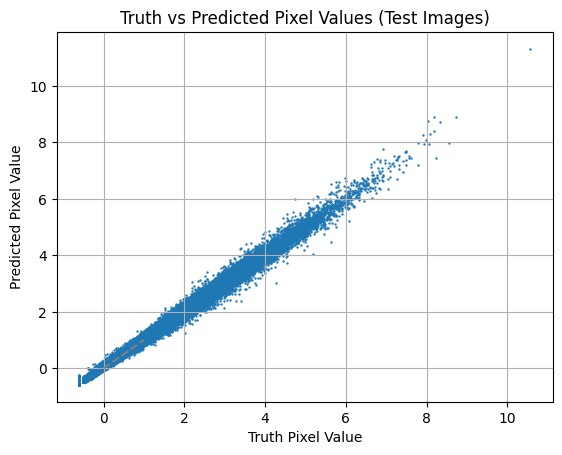

In [76]:
plt.scatter(model.predict(X_val),y_val, s=0.5)
plt.title('Truth vs Predicted Pixel Values (Test Images)')
plt.xlabel('Truth Pixel Value')
plt.ylabel('Predicted Pixel Value')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.grid()
plt.show()


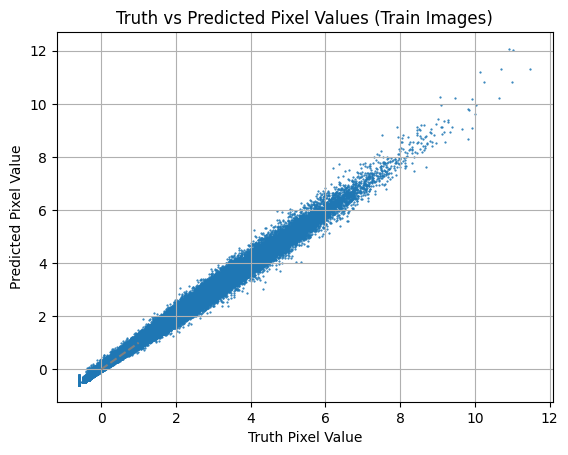

In [70]:
plt.scatter(model.predict(X_train),y_train, s=0.3)
plt.title('Truth vs Predicted Pixel Values (Train Images)')
plt.xlabel('Truth Pixel Value')
plt.ylabel('Predicted Pixel Value')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.grid()
plt.show()


In [77]:
y_pred = model.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error
# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0027


# 模型预测

- 图像预测

In [79]:
y_val[0]-y_pred[0]

array([0.00718035])

Text(0.5, 1.0, 'Predicted Sample')

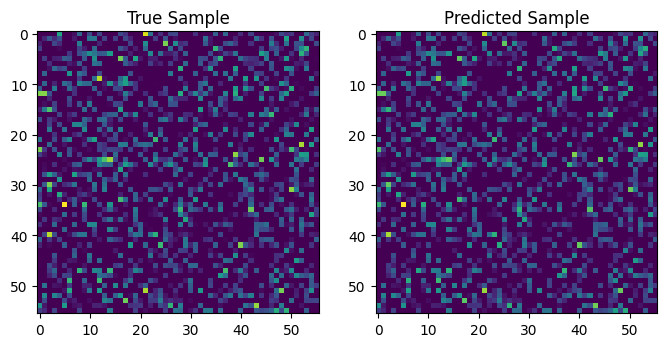

In [80]:
import skimage.io as io
idx = np.random.randint(0, y_pred.shape[0])

true_sample=y_test.reshape(-1,56,56)[0]
pred_sample=y_pred.reshape(-1,56,56)[0]


# 创建一个包含两个子图的图像窗口
fig, ax = plt.subplots(1, 2, figsize=(8, 4))



# 显示真实图像
ax[0].imshow(true_sample)
ax[0].set_title('True Sample')


# 显示预测图像
ax[1].imshow(pred_sample)
ax[1].set_title('Predicted Sample')
